In [1]:
#Imports

from __future__ import print_function, division
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import initializers

import matplotlib.pyplot as plt

import numpy as np

import keras


Using TensorFlow backend.


In [2]:
#Parameters of the model
batch_size = 256
num_classes = 10
epochs = 200
data_augmentation = True

In [3]:
#Generation of the dataset.
(x_train,y_train), (x_test, y_test)=cifar10.load_data()

(50000, 32, 32, 3)


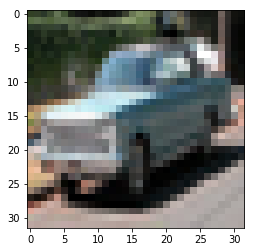

[1]


In [4]:
print(x_train.shape)
plt.imshow(x_train[32,:,:,:])
plt.show()
print(y_train[32,:])


In [5]:
#Transform in hot encoding with two classes only (0 or 1) with car =1
for i in range(0,y_train.shape[0]):
    y_train[i,:]=int(y_train[i,:]==1) 
print(type(y_train[2,:]))

for i in range(0,y_test.shape[0]):
    y_test[i,:]=int(y_test[i,:]==1) 
print(type(y_test[2,:]))

print(y_train.shape)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(50000, 1)


In [6]:
model = Sequential()

#Weights Init is performed as in http://cs231n.github.io/neural-networks-2/ for deep networks.


model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:], kernel_initializer=initializers.VarianceScaling(scale=2.0)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer=initializers.VarianceScaling(scale=2.0)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer=initializers.VarianceScaling(scale=2.0)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),kernel_initializer=initializers.VarianceScaling(scale=2.0)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_initializer=initializers.VarianceScaling(scale=2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))





In [7]:
# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

opt=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalization
x_train /= 255
x_test /= 255


In [8]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
36096/50000 [====================>.........] - ETA: 586s - loss: 0.3194 - acc: 0.8966

KeyboardInterrupt: 

In [47]:
#Run Tests

score = model.evaluate(x_test, y_test, verbose=0)
print(score)



[0.35449470987319948, 0.90000000000000002]
